# Car Evaluation Project - Code
By: Mohamed Abdalla

In [1]:
import numpy as np
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import itertools

from matplotlib import *
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
# Loading the cars dataset
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
print(df)

# Setting up label input variables
input_labels = [
    ["buying", ["vhigh", "high", "med", "low"]],
    ["maint", ["vhigh", "high", "med", "low"]],
    ["doors", ["2", "3", "4", "5more"]],  # Here indexes are not real values
    ["persons", ["2", "4", "more"]],
    ["lug_boot", ["small", "med", "big"]],
    ["safety", ["low", "med", "high"]],
]

class_names = ["unacc", "acc", "good", "vgood"]

          0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
5     vhigh  vhigh      2     2    med  high  unacc
6     vhigh  vhigh      2     2    big   low  unacc
7     vhigh  vhigh      2     2    big   med  unacc
8     vhigh  vhigh      2     2    big  high  unacc
9     vhigh  vhigh      2     4  small   low  unacc
10    vhigh  vhigh      2     4  small   med  unacc
11    vhigh  vhigh      2     4  small  high  unacc
12    vhigh  vhigh      2     4    med   low  unacc
13    vhigh  vhigh      2     4    med   med  unacc
14    vhigh  vhigh      2     4    med  high  unacc
15    vhigh  vhigh      2     4    big   low  unacc
16    vhigh  vhigh      2     4    big   med  unacc
17    vhigh  vhigh      2     4    big  high  unacc
18    vhigh 

In [3]:
# Most values are strings and need to be converted to unique numerical values

df = df.replace('vhigh', 4)
df = df.replace('high', 3)
df = df.replace('med', 2)
df = df.replace('low', 1)
df = df.replace('5more', 6)
df = df.replace('more', 5)
df = df.replace('small', 1)
df = df.replace('med', 2)
df = df.replace('big', 3)
df = df.replace('unacc', 1)
df = df.replace('acc', 2)
df = df.replace('good', 3)
df = df.replace('vgood', 4)

print(df)

      0  1  2  3  4  5  6
0     4  4  2  2  1  1  1
1     4  4  2  2  1  2  1
2     4  4  2  2  1  3  1
3     4  4  2  2  2  1  1
4     4  4  2  2  2  2  1
5     4  4  2  2  2  3  1
6     4  4  2  2  3  1  1
7     4  4  2  2  3  2  1
8     4  4  2  2  3  3  1
9     4  4  2  4  1  1  1
10    4  4  2  4  1  2  1
11    4  4  2  4  1  3  1
12    4  4  2  4  2  1  1
13    4  4  2  4  2  2  1
14    4  4  2  4  2  3  1
15    4  4  2  4  3  1  1
16    4  4  2  4  3  2  1
17    4  4  2  4  3  3  1
18    4  4  2  5  1  1  1
19    4  4  2  5  1  2  1
20    4  4  2  5  1  3  1
21    4  4  2  5  2  1  1
22    4  4  2  5  2  2  1
23    4  4  2  5  2  3  1
24    4  4  2  5  3  1  1
25    4  4  2  5  3  2  1
26    4  4  2  5  3  3  1
27    4  4  3  2  1  1  1
28    4  4  3  2  1  2  1
29    4  4  3  2  1  3  1
...  .. .. .. .. .. .. ..
1698  1  1  4  5  3  1  1
1699  1  1  4  5  3  2  3
1700  1  1  4  5  3  3  4
1701  1  1  6  2  1  1  1
1702  1  1  6  2  1  2  1
1703  1  1  6  2  1  3  1
1704  1  1  

In [4]:
car = df.values

In [5]:
X,y = car[:,:6], car[:,6]

In [6]:
X, y = X.astype(int), y.astype(int)
print(X)
print(y)

[[4 4 2 2 1 1]
 [4 4 2 2 1 2]
 [4 4 2 2 1 3]
 ..., 
 [1 1 6 5 3 1]
 [1 1 6 5 3 2]
 [1 1 6 5 3 3]]
[1 1 1 ..., 1 3 4]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn import tree

max_depth = 6
clf1 = tree.DecisionTreeClassifier(max_depth=max_depth)
clf1 = clf1.fit(X_train, y_train)
print("Decision Tree accuracy: ", clf1.score(X_test, y_test) * 100)

Decision Tree accuracy:  92.2928709056


That's not a bad score for a basic DecisionTreeClassifier!

Graphing the feature importance chart

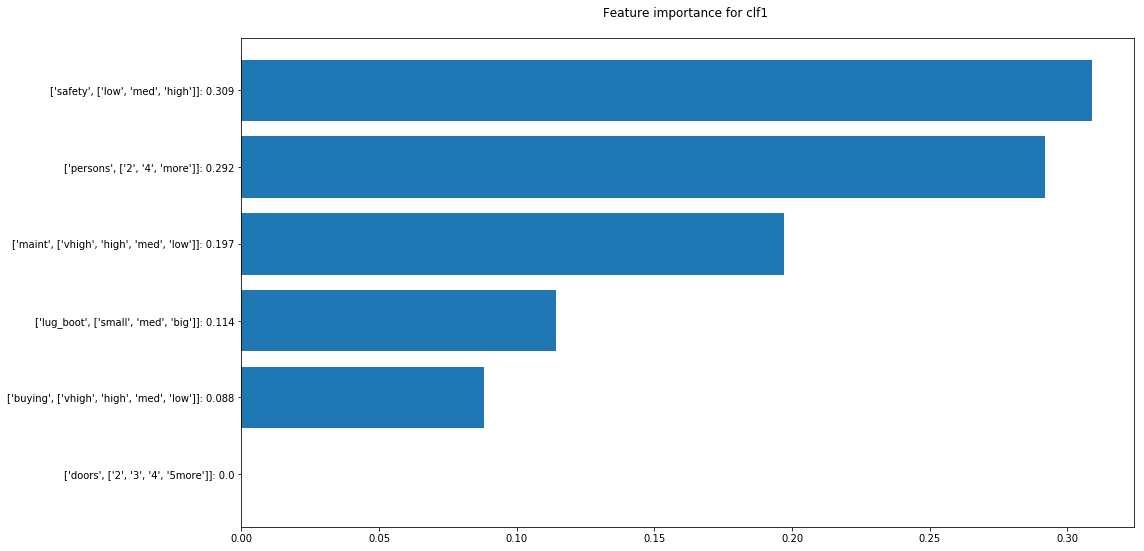

In [11]:
input_labels = [
    ["buying", ["vhigh", "high", "med", "low"]],
    ["maint", ["vhigh", "high", "med", "low"]],
    ["doors", ["2", "3", "4", "5more"]],
    ["persons", ["2", "4", "more"]],
    ["lug_boot", ["small", "med", "big"]],
    ["safety", ["low", "med", "high"]],
]

class_names = ["unacc", "acc", "good", "vgood"]


def feature_importance_chart(clf, classifier_name, feature_names):
    sorted_feature_importances, sorted_feature_names = (
        zip(*sorted(zip(clf.feature_importances_, feature_names)))
    )
    plt.figure(figsize=(16, 9))
    plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances)
    plt.yticks(
        range(len(sorted_feature_importances)),
        ["{}: {:.3}".format(a, b) for a, b in zip(sorted_feature_names, sorted_feature_importances)]
    )
    plt.title("Feature importance for clf1 \n".format(classifier_name))
    plt.show()

feature_importance_chart(clf1, "simple tree", input_labels)

In [51]:
# Increasing the max_depth

clf1 = tree.DecisionTreeClassifier(max_depth=None)
clf1 = clf1.fit(X_train, y_train)
print("Decision Tree accuracy: ", clf1.score(X_test, y_test) * 100)

Decision Tree accuracy:  98.2658959538


In [ ]:
#Plot the Tree

def plot_first_tree(clf, class_names, tree_name):
    graph_save_path = os.path.join(
        "exported_tree", 
        "{}".format(tree_name)
    )

    tree.export_graphviz(clf, out_file="{}.dot".format(graph_save_path))
    dotfile = StringIO()
    tree.export_graphviz(
        clf, out_file=dotfile,
        feature_names=feature_names, class_names=class_names,
        filled=True, rotate=True
    )
    pydot.graph_from_dot_data(dotfile.getvalue())[0].write_png("{}.png".format(graph_save_path))


plot_first_tree(clf, class_names, tree_name="simple_tree")

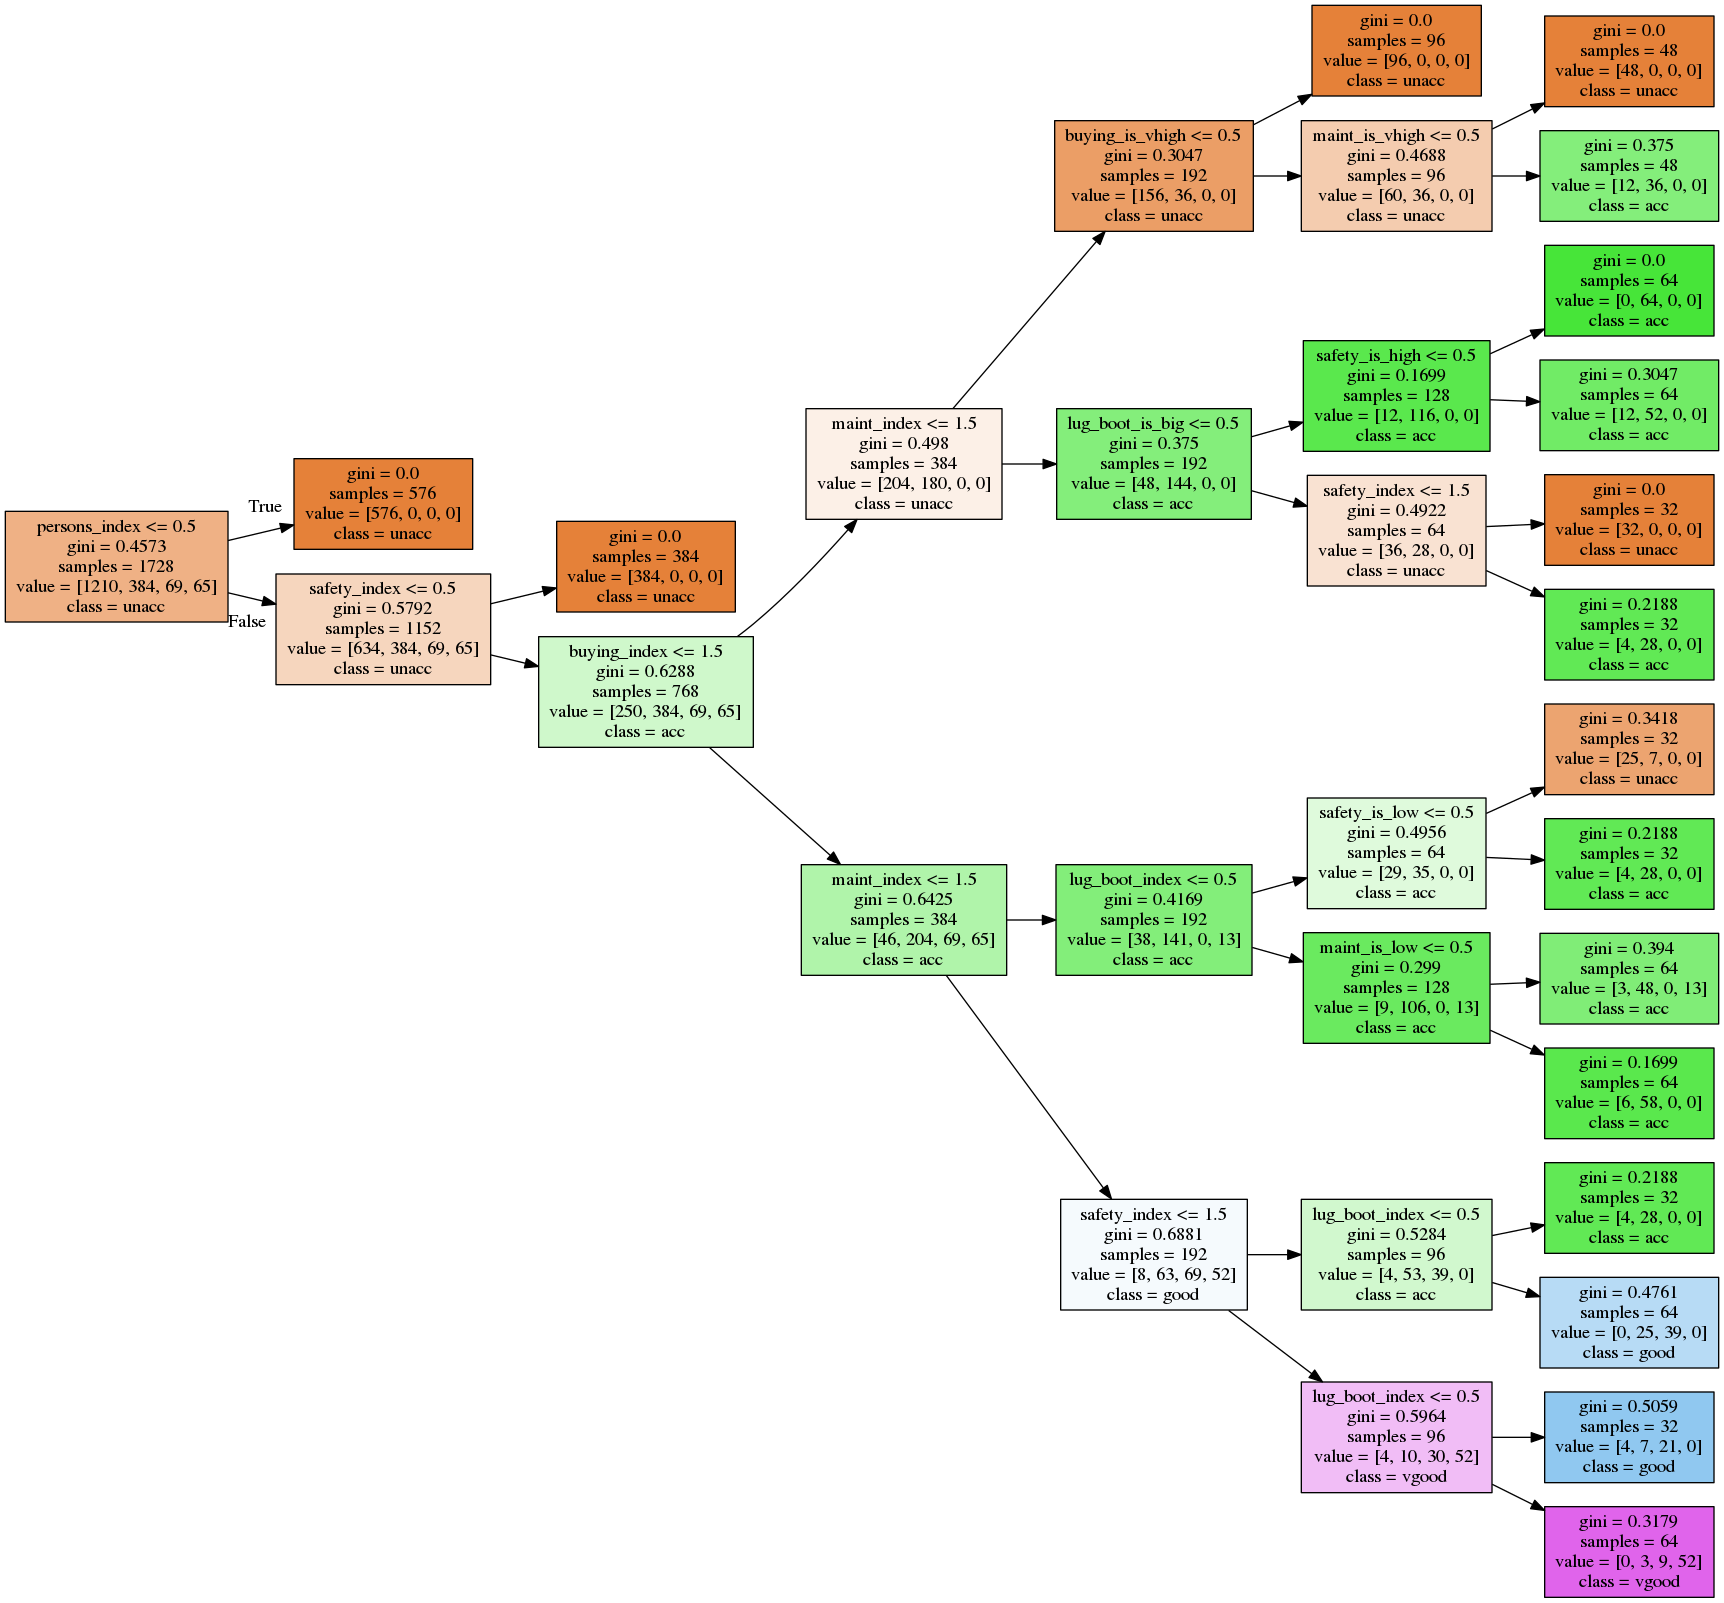

In [35]:
# Creating the RandomForestClassifer

clf = ensemble.RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
print("Random Forest accuracy: ", clf.score(X_test, y_test)*100)

Random Forest accuracy:  97.4951830443


In [37]:
# That's not a bad accuracy for the test. Maybe scaling the data will result in a better score

scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf.fit(X_train_scaled,y_train)
print("Scaled Random Forest accuracy: ", clf.score(X_test_scaled,y_test)*100)


C:\Users\moemi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Scaled Random Forest accuracy:  97.880539499


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC3D873DD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CC3EE1FCF8>]], dtype=object)

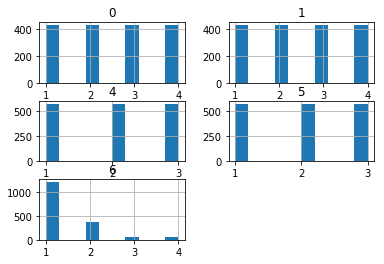

In [38]:
df.hist()

In [58]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("KNN accuracy: ", score*100)

KNN accuracy:  93.6416184971
